# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree



In [20]:
# Load the dataset 
df = pd.read_csv('datasets/data.csv')
df.shape 
df.head()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# Data preprocessing 

In [21]:
# Seperating features (x) and target (y)
x = df.drop ('Bankrupt?', axis=1)
y = df['Bankrupt?']

# Split the dataset into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Random Forest, Classification Report, ROC and AUC curve 


c:\Users\tanyi\Desktop\MYONE-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\tanyi\Desktop\MYONE-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


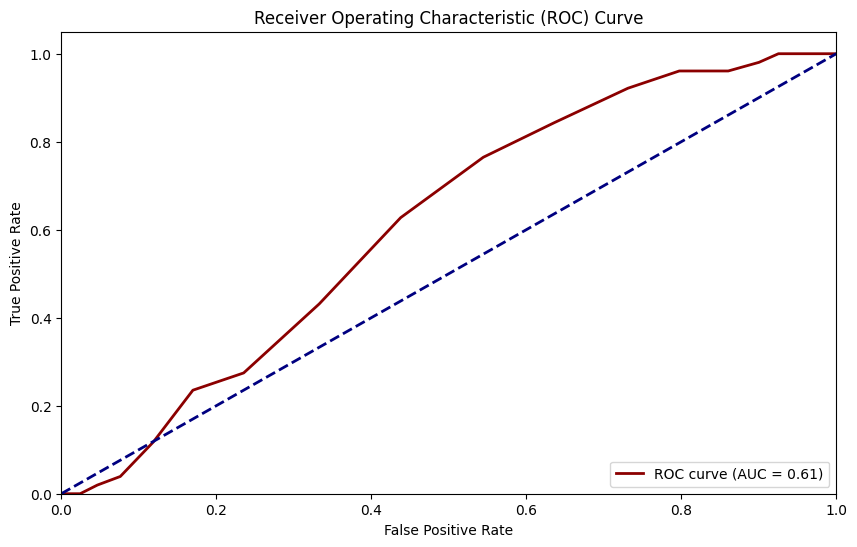

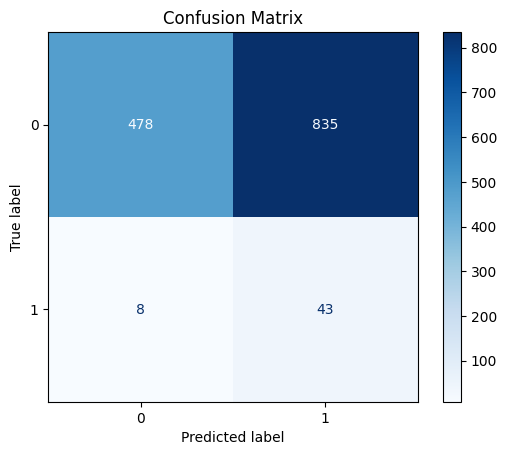

AUC Score: 0.613
F1 Score: 0.093

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.36      0.53      1313
           1       0.05      0.84      0.09        51

    accuracy                           0.38      1364
   macro avg       0.52      0.60      0.31      1364
weighted avg       0.95      0.38      0.51      1364



In [16]:
# Creating the model 

# Using Logistic Regression to train the model 
REG_CONST = 0.01
model = LogisticRegression(penalty='l2', C=1./REG_CONST, max_iter=300)
model.fit(x_train_scaled, y_train)

# Training Random Forest
randomforest_model = RandomForestClassifier(random_state=42)
randomforest_model.fit(x_train,y_train) 

#Prediction of test data and measuring the accuracy of it 
y_pred = model.predict(x_test_scaled)
acc = (y_pred == y_test).mean()
y_pred = randomforest_model.predict(x_test_scaled)
y_pred_proba = randomforest_model.predict_proba(x_test_scaled)[:, 1]

# Calculating the ROC and AUC curve 
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkred', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Creating and plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculating the F1 score
f1 = f1_score(y_test, y_pred)

# Printing the AUC score
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

# Printing the Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Decision Tree 

Depth = 1, train_acc = 0.9667, eval_acc = 0.9756
Depth = 2, train_acc = 0.9698, eval_acc = 0.9746
Depth = 3, train_acc = 0.9726, eval_acc = 0.9765
Depth = 4, train_acc = 0.9761, eval_acc = 0.9668
Depth = 5, train_acc = 0.9814, eval_acc = 0.9726
Depth = 6, train_acc = 0.9853, eval_acc = 0.9717
Depth = 7, train_acc = 0.9887, eval_acc = 0.9668
Depth = 8, train_acc = 0.9912, eval_acc = 0.9648


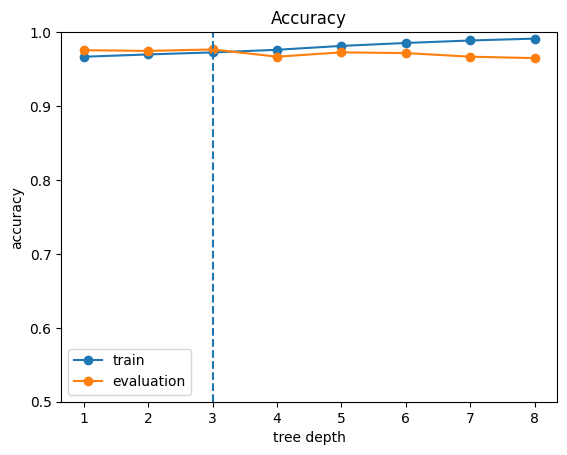

In [26]:
# Separate the data into features and target class.
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

# Split the data into training, validation and test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size = 0.5)

# Create decision tree models of various depths, 
# and measure the accuracy of validation data for each model.
train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth+1):
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(x_train, y_train)
    
    # Measure the accuracy of this model using the training data.
    y_pred = model.predict(x_train)
    train_acc.append((y_pred == y_train).mean())

    # Measure the accuracy of this model using the validation data.
    y_pred = model.predict(x_eval)
    eval_acc.append((y_pred == y_eval).mean())
    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))

# Find the optimal depth with the highest accuracy of validation data.
opt_depth = np.argmax(eval_acc) + 1

# Visualize accuracy changes as depth changes.
plt.plot(train_acc, marker='o', label='train')
plt.plot(eval_acc, marker='o', label='evaluation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5, 1.0)
plt.show()

DecisionTreeClassifier: accuracy = 0.964


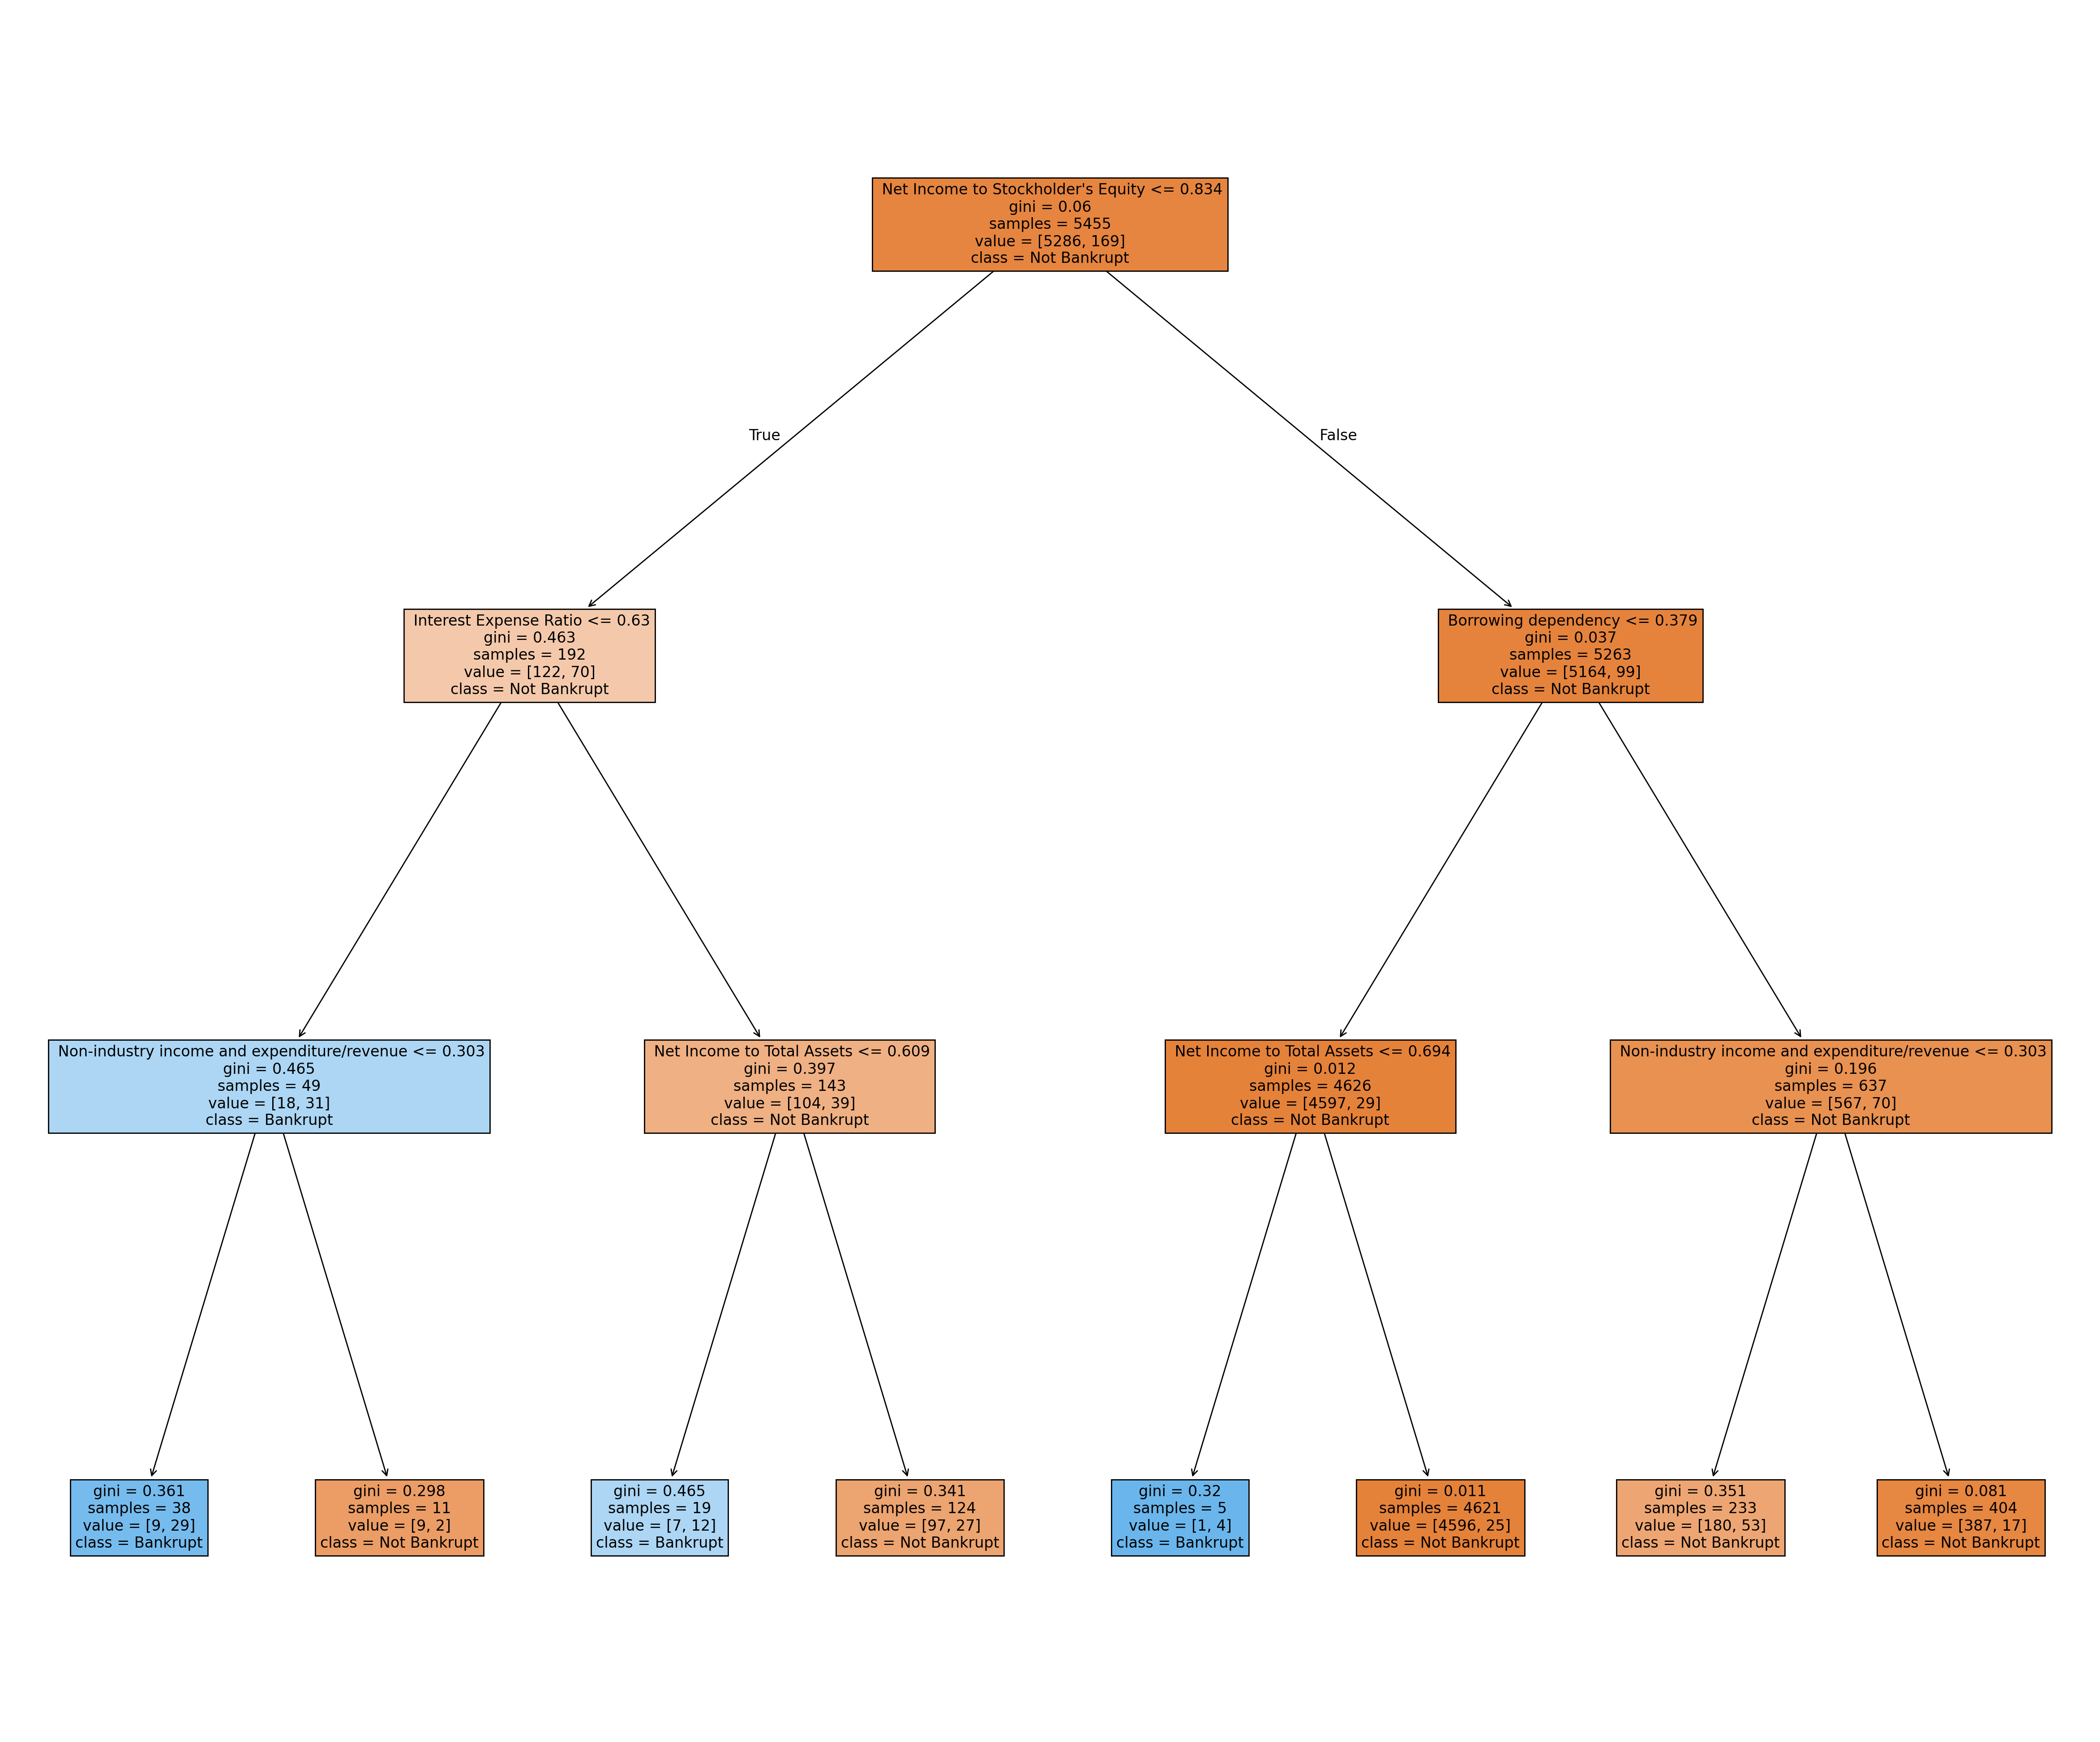

In [24]:
#Building the decision tree 
#Re-defining variables 
x = df.drop ('Bankrupt?', axis=1)
y = df['Bankrupt?']
depth = 3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

DT_model = DecisionTreeClassifier(max_depth=depth, 
                                  random_state=42)
DT_model.fit(x_train, y_train)
sk_pred = DT_model.predict(x_test)
acc = (y_test == sk_pred).mean()
print('DecisionTreeClassifier: accuracy = {:.3f}'.format(acc))

# plotting 
feature_names = x.columns.tolist()
plt.figure(figsize=(30, 25), dpi=200)
tree.plot_tree(DT_model,
               feature_names=feature_names,
               class_names=['Not Bankrupt', 'Bankrupt'],
               filled=True, #Blue represents Not Bankrupt  #Orange represents Bankrupt 
               fontsize=12   
            )
plt.show()

## Feature Importance 

c:\Users\tanyi\Desktop\MYONE-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\tanyi\Desktop\MYONE-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Depth = 1, train_acc = 0.8450, eval_acc = 0.9687
Depth = 2, train_acc = 0.8450, eval_acc = 0.9648


c:\Users\tanyi\Desktop\MYONE-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Depth = 3, train_acc = 0.8450, eval_acc = 0.9638


c:\Users\tanyi\Desktop\MYONE-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Depth = 4, train_acc = 0.8450, eval_acc = 0.9599


c:\Users\tanyi\Desktop\MYONE-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Depth = 5, train_acc = 0.8450, eval_acc = 0.9629


c:\Users\tanyi\Desktop\MYONE-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Depth = 6, train_acc = 0.8450, eval_acc = 0.9599


c:\Users\tanyi\Desktop\MYONE-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Depth = 7, train_acc = 0.8450, eval_acc = 0.9619


c:\Users\tanyi\Desktop\MYONE-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Depth = 8, train_acc = 0.8450, eval_acc = 0.9550


c:\Users\tanyi\Desktop\MYONE-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Depth = 9, train_acc = 0.8450, eval_acc = 0.9550


c:\Users\tanyi\Desktop\MYONE-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Depth = 10, train_acc = 0.8450, eval_acc = 0.9541


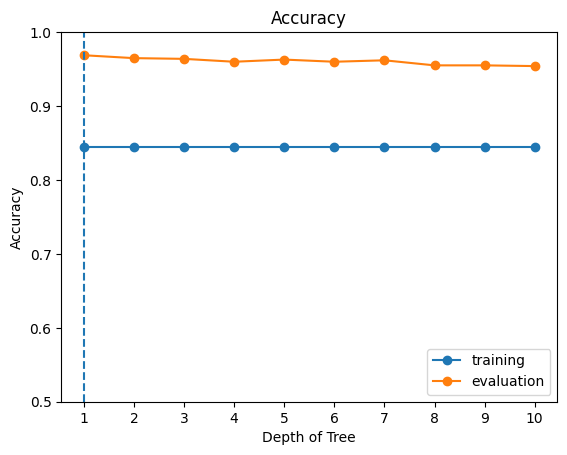

In [6]:
# Separate the data into features and target class.
x = df.drop ('Bankrupt?', axis=1)
y = df['Bankrupt?']

# Split the data into training, validation and test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size = 0.5)

# Create decision tree models of various depths, 
# and measure the accuracy of validation data for each model.
train_acc = []
eval_acc = []
max_depth = 10
for d in range(1, max_depth+1):
    DT_model = DecisionTreeClassifier(max_depth=d)
    DT_model.fit(x_train, y_train)
    
    # Measure the accuracy of this model using the training data.
    y_pred = model.predict(x_train)
    train_acc.append((y_pred == y_train).mean())

    # Measure the accuracy of this model using the validation data.
    y_pred = DT_model.predict(x_eval)
    eval_acc.append((y_pred == y_eval).mean())
    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))

# Find the optimal depth with the highest accuracy of validation data.
opt_depth = np.argmax(eval_acc) + 1

# Visualize accuracy changes as depth changes.
plt.plot(train_acc, marker='o', label='training')
plt.plot(eval_acc, marker='o', label='evaluation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5, 1.0)
plt.show()